# Exploratory data analysis of the sentinel data




In [ ]:
%pip install prince

In [114]:
# load important libraries for data manupulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
%matplotlib inline

In [3]:
# load the dataset
df= pd.read_csv('/home/drdc/Documents/drdc/open_projects/agrifield_workshop/wk100823/dc-workshop/processed/soil_ndvi.csv',)

In [4]:
# look at the dimension of the data
df.shape

(107, 43)

In [5]:
#look at the header of te data
df.head()

,Blokk,Tabla,Mintazn,Ter,Tabla_1,Mntzn_1,labazon,ZonaTer,pH_KCl,KA,...,ZnKat,CuKat,MnKat,SO4Kat,_NDVImean,_NDVImedian,_NDVImin,_NDVImax,_NDVIrange,_NDVImajority
0,F5WEW717,UjLegelo_Also,AGT70,43.50,UjLegelo_Also,AGT70,4340,2.627090,4.9,45.6,...,j�,j�,t�lzott,gyenge,0.362426,0.405184,0.145333,0.681716,0.536383,0.145333
1,F611WX17,Vizhaz_teto,AGT2,21.70,Vizhaz_teto,AGT2,4290,2.258546,6.2,44.8,...,gyenge,j�,t�lzott,gyenge,0.480932,0.459361,0.329373,0.944340,0.614967,0.329373
2,F4XMWE17,Siskas,AGT3,22.15,Siskas,AGT3,4291,1.150359,5.6,41.6,...,j�,j�,t�lzott,gyenge,0.400637,0.404977,0.263005,0.444088,0.181083,0.263005
3,FQM1W417,Cserja_also,AGT4,11.52,Cserja_also,AGT4,4292,3.859943,5.3,46.0,...,j�,j�,t�lzott,gyenge,0.302898,0.306108,0.108122,0.457178,0.349055,0.108122
4,F6F7WL17,NagySzeles_Also,AGT55,36.80,NagySzeles_Also,AGT55,4331,4.245913,4.8,45.6,...,gyenge,j�,t�lzott,gyenge,0.692812,0.688324,0.599900,0.849275,0.249375,0.599900


In [6]:
# look at the data and columns types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Blokk          107 non-null    object 
 1   Tabla          107 non-null    object 
 2   Mintazn        107 non-null    object 
 3   Ter            107 non-null    float64
 4   Tabla_1        107 non-null    object 
 5   Mntzn_1        107 non-null    object 
 6   labazon        107 non-null    object 
 7   ZonaTer        107 non-null    float64
 8   pH_KCl         107 non-null    float64
 9   KA             107 non-null    float64
 10  Ossz_so        107 non-null    float64
 11  CaCO3          107 non-null    float64
 12  Humusz         107 non-null    float64
 13  NO3_N          107 non-null    float64
 14  P2O5           107 non-null    float64
 15  K2O            107 non-null    float64
 16  Mg             107 non-null    float64
 17  Na             107 non-null    float64
 18  Zn        

In [7]:
# verify the columns names and select want we want for our analysis
df.columns

Index(['Blokk', 'Tabla', 'Mintazn', 'Ter', 'Tabla_1', 'Mntzn_1', 'labazon',
       'ZonaTer', 'pH_KCl', 'KA', 'Ossz_so', 'CaCO3', 'Humusz', 'NO3_N',
       'P2O5', 'K2O', 'Mg', 'Na', 'Zn', 'Cu', 'Mn', 'SO4', 'Termhly',
       'KmhtsKt', 'TextrKt', 'OsszsKt', 'NaKat', 'CaCO3Kt', 'NONKat',
       'NtrgnKt', 'P2O5Kat', 'K2OKat', 'MgKat', 'ZnKat', 'CuKat', 'MnKat',
       'SO4Kat', '_NDVImean', '_NDVImedian', '_NDVImin', '_NDVImax',
       '_NDVIrange', '_NDVImajority'],
      dtype='object')

In [24]:
# remove columns that are not useful to our analysis
columns=['Blokk', 'pH_KCl', 'KA', 'Ossz_so', 'CaCO3', 'Humusz', 'NO3_N',
       'P2O5', 'K2O', 'Mg', 'Na', 'Zn', 'Cu', 'Mn', 'SO4','_NDVImean']

#subset the our data frame
df_sub=df[columns]

# look at the data again

df_sub.head()

,Blokk,pH_KCl,KA,Ossz_so,CaCO3,Humusz,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,_NDVImean
0,F5WEW717,4.9,45.6,0.020000,0.2,2.524025,12.1,104.4,250.237016,344.15000,44.253303,1.6892,4.0896,660.740,0.70,0.362426
1,F611WX17,6.2,44.8,0.021645,0.2,2.144423,9.8,35.0,307.592680,295.75000,47.696766,1.2434,3.3180,413.830,0.50,0.480932
2,F4XMWE17,5.6,41.6,0.020000,0.2,2.253877,5.0,97.2,290.016495,310.53125,47.363402,1.6608,4.2918,475.405,0.50,0.400637
3,FQM1W417,5.3,46.0,0.020000,0.2,2.497108,16.9,69.6,250.147170,293.68750,45.405705,1.6386,3.6522,396.240,0.79,0.302898
4,F6F7WL17,4.8,45.6,0.021452,0.2,2.811486,16.4,82.7,244.710592,441.90000,42.171972,1.4844,3.6260,438.275,0.76,0.692812


In [25]:
# verify data types again
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Blokk      107 non-null    object 
 1   pH_KCl     107 non-null    float64
 2   KA         107 non-null    float64
 3   Ossz_so    107 non-null    float64
 4   CaCO3      107 non-null    float64
 5   Humusz     107 non-null    float64
 6   NO3_N      107 non-null    float64
 7   P2O5       107 non-null    float64
 8   K2O        107 non-null    float64
 9   Mg         107 non-null    float64
 10  Na         107 non-null    float64
 11  Zn         107 non-null    float64
 12  Cu         107 non-null    float64
 13  Mn         107 non-null    float64
 14  SO4        107 non-null    float64
 15  _NDVImean  107 non-null    float64
dtypes: float64(15), object(1)
memory usage: 13.5+ KB


In [30]:
# Rename some columns to have meaningful column names

df_sub.rename(columns={"Blokk":"field_id","Ossz_so":"salt","_NDVImean":"mean_ndvi", "Humusz":"Humus"}, inplace=True)
df_sub.head()

/tmp/ipykernel_15189/1104426323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.rename(columns={"Blokk":"field_id","Ossz_so":"salt","_NDVImean":"mean_ndvi", "Humusz":"Humus"}, inplace=True)


,field_id,pH_KCl,KA,salt,CaCO3,Humus,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,mean_ndvi
0,F5WEW717,4.9,45.6,0.020000,0.2,2.524025,12.1,104.4,250.237016,344.15000,44.253303,1.6892,4.0896,660.740,0.70,0.362426
1,F611WX17,6.2,44.8,0.021645,0.2,2.144423,9.8,35.0,307.592680,295.75000,47.696766,1.2434,3.3180,413.830,0.50,0.480932
2,F4XMWE17,5.6,41.6,0.020000,0.2,2.253877,5.0,97.2,290.016495,310.53125,47.363402,1.6608,4.2918,475.405,0.50,0.400637
3,FQM1W417,5.3,46.0,0.020000,0.2,2.497108,16.9,69.6,250.147170,293.68750,45.405705,1.6386,3.6522,396.240,0.79,0.302898
4,F6F7WL17,4.8,45.6,0.021452,0.2,2.811486,16.4,82.7,244.710592,441.90000,42.171972,1.4844,3.6260,438.275,0.76,0.692812


## Undenstandingdata with descriptive statistics

In [39]:
df_sub.shape

(107, 16)

In [31]:
#summarize numerical columns only

df_sub.describe()

,pH_KCl,KA,salt,CaCO3,Humus,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,mean_ndvi
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,5.271028,45.115888,0.021792,0.200683,2.286339,9.782243,95.509346,303.717425,321.575794,47.772507,1.585789,3.585579,438.314252,0.679813,0.525190
std,0.449110,2.014296,0.003332,0.007062,0.417098,5.763431,153.210243,185.341432,66.277103,18.057905,0.888192,0.671421,85.179139,0.283835,0.147482
min,4.600000,41.600000,0.020000,0.200000,1.400000,2.700000,26.600000,170.193162,153.700000,21.414979,0.800000,2.200000,275.000000,0.500000,0.246026
25%,5.000000,44.000000,0.020000,0.200000,2.007019,5.250000,48.200000,209.837709,286.015625,39.187668,1.200000,3.200000,386.557500,0.500000,0.430681
50%,5.200000,45.000000,0.020000,0.200000,2.228942,8.000000,60.600000,249.813184,311.031250,45.193375,1.367400,3.510200,419.045000,0.540000,0.504137
75%,5.300000,46.000000,0.022028,0.200000,2.496048,12.950000,83.650000,310.120944,348.471875,50.155357,1.625300,3.871700,482.927500,0.765000,0.642383
max,6.900000,55.000000,0.031943,0.273049,4.000000,26.300000,1342.500000,1274.745565,693.800000,175.700000,6.500000,6.100000,824.595000,1.780000,0.803364


In [32]:
#correlation between numeric variables
#here we will use the pearson correlation method
df_sub.iloc[:,1:17].corr(method='pearson')

,pH_KCl,KA,salt,CaCO3,Humus,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,mean_ndvi
pH_KCl,1.000000,0.232546,0.641920,0.310497,0.168374,0.141942,0.442768,0.393889,0.104730,0.255039,0.508071,0.283969,0.146005,0.173579,-0.180853
KA,0.232546,1.000000,0.330104,0.042832,0.703535,0.493751,0.606628,0.516486,0.230031,0.320632,0.529833,0.333321,0.014186,0.161812,0.186255
salt,0.641920,0.330104,1.000000,0.283737,0.364627,0.659639,0.514282,0.349682,0.110855,0.069019,0.552239,0.291327,0.140828,0.649373,-0.378458
CaCO3,0.310497,0.042832,0.283737,1.000000,0.095971,0.189938,0.228783,0.202887,-0.169357,-0.082375,0.405993,0.190168,-0.037118,0.343876,-0.052142
Humus,0.168374,0.703535,0.364627,0.095971,1.000000,0.603658,0.597095,0.567836,0.377481,0.222102,0.542371,0.548391,0.263911,0.290857,0.078856
NO3_N,0.141942,0.493751,0.659639,0.189938,0.603658,1.000000,0.395427,0.291205,0.299740,0.050147,0.405774,0.362412,0.241439,0.738827,-0.294556
P2O5,0.442768,0.606628,0.514282,0.228783,0.597095,0.395427,1.000000,0.681418,0.227668,0.229152,0.740332,0.484986,0.106958,0.174049,0.023274
K2O,0.393889,0.516486,0.349682,0.202887,0.567836,0.291205,0.681418,1.000000,0.040869,0.156685,0.657352,0.496409,0.248308,0.077712,0.231751
Mg,0.104730,0.230031,0.110855,-0.169357,0.377481,0.299740,0.227668,0.040869,1.000000,0.366437,0.073105,0.302307,0.299774,0.242203,-0.070789
Na,0.255039,0.320632,0.069019,-0.082375,0.222102,0.050147,0.229152,0.156685,0.366437,1.000000,0.169326,0.198018,-0.023724,0.070304,0.193072


# Visual assessment of data

## Univariate data exploration

These data points make sense since, at this time, Haitians were going through the tough time of earthquakes

/tmp/ipykernel_15189/3659837263.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_sub.iloc[:,1:17].hist(ax=ax);


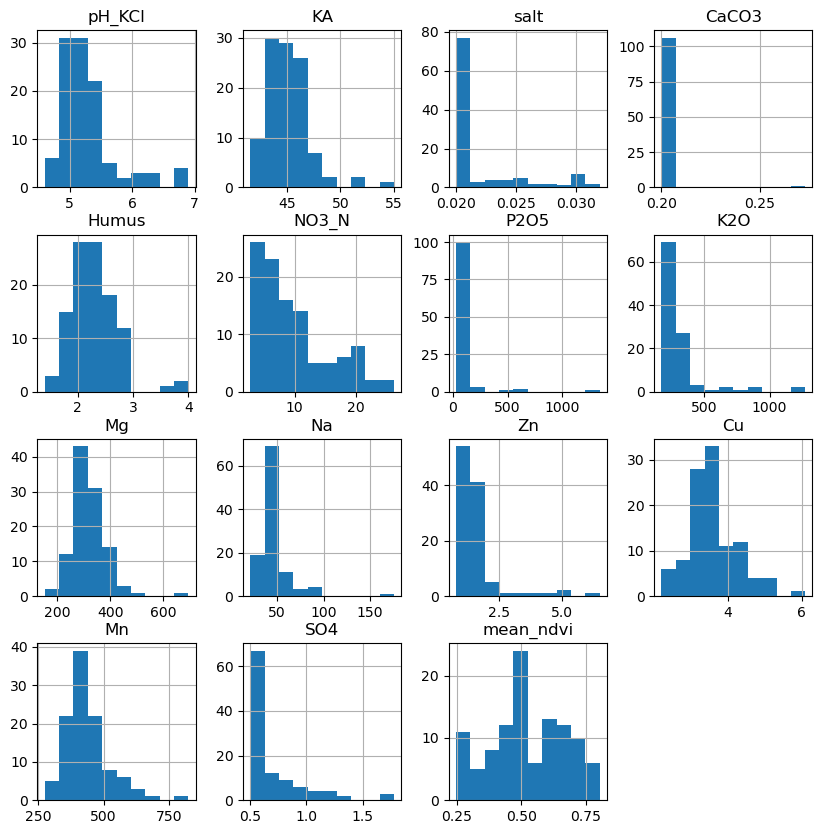

In [37]:
#We can also plot all numeric variables at the same time
fig=plt.figure(figsize=[10,10])
ax=fig.gca()
df_sub.iloc[:,1:16].hist(ax=ax);

/tmp/ipykernel_15189/3019785733.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_sub.iloc[:,1:17].plot(kind='box', subplots=True, sharex=False, layout=(4,4), sharey=False, ax=ax);


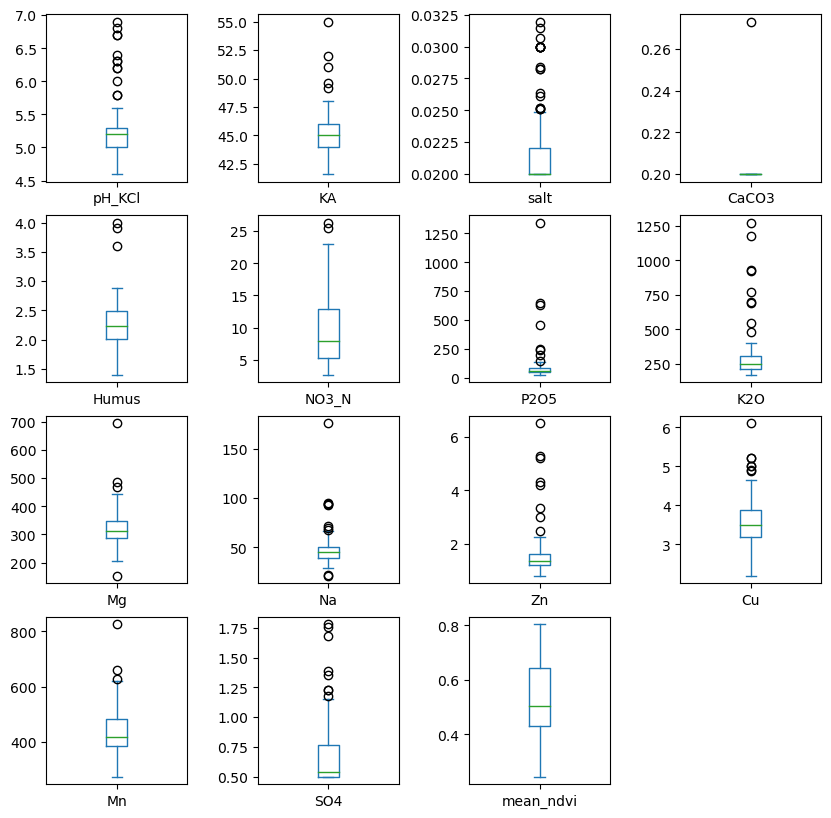

In [38]:
# undestandan data with box plot
fig=plt.figure(figsize=[10,10])
plt.subplots_adjust(wspace=0.5)
ax=fig.gca()
df_sub.iloc[:,1:16].plot(kind='box', subplots=True, sharex=False, layout=(4,4), sharey=False, ax=ax);

<Figure size 640x480 with 0 Axes>

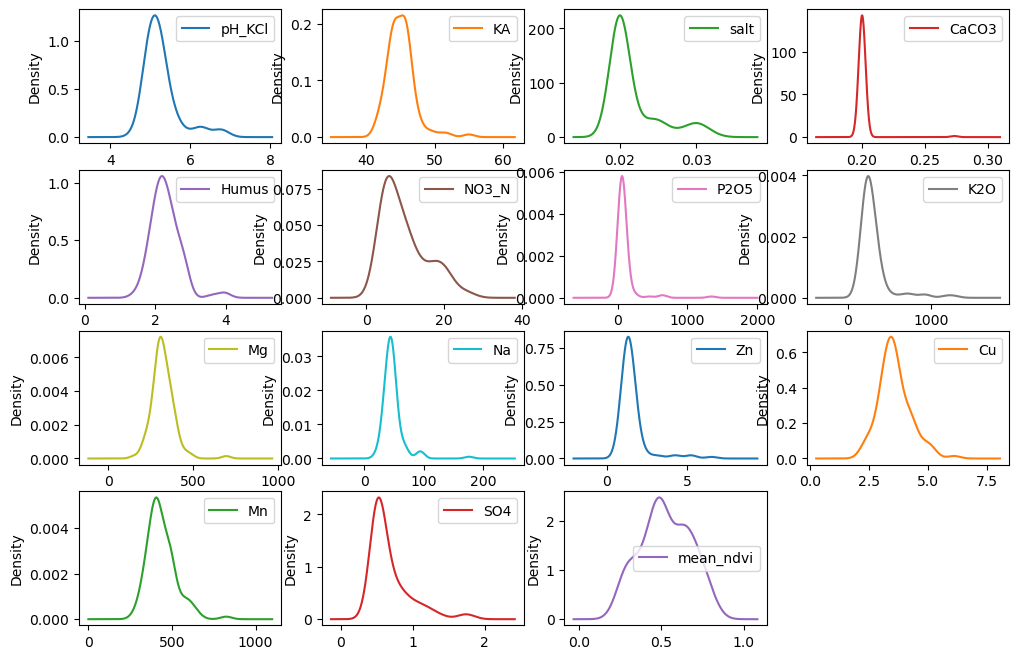

In [40]:
#let's look at the density plot of all bands
plt.subplots_adjust(wspace=0.8)
df_sub.plot(kind='density', sharex=False, subplots=True, layout=(4,4),figsize=(12,8));

## Bivariate Exploration

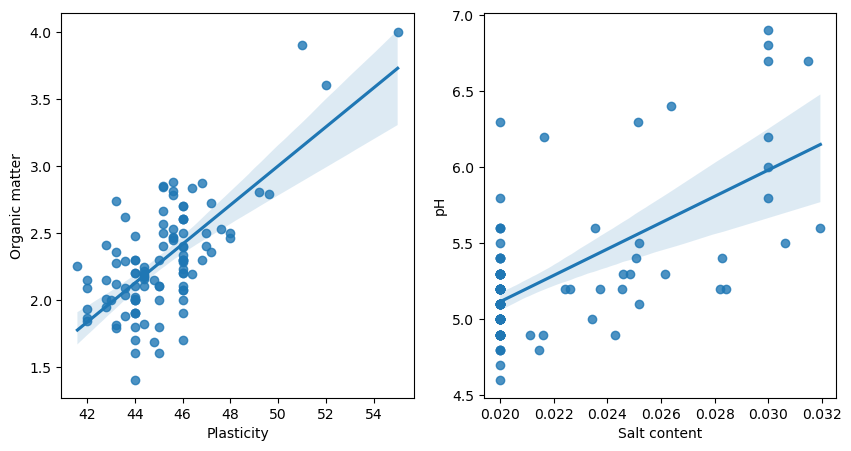

In [58]:
# Pairewise assessment of variables
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.regplot(data=df_sub, x="KA", y="Humus")
plt.ylabel("Organic matter")
plt.xlabel("Plasticity")

plt.subplot(1,2,2)
sns.regplot(data=df_sub, x="salt", y="pH_KCl")
plt.ylabel("pH")
plt.xlabel("Salt content");

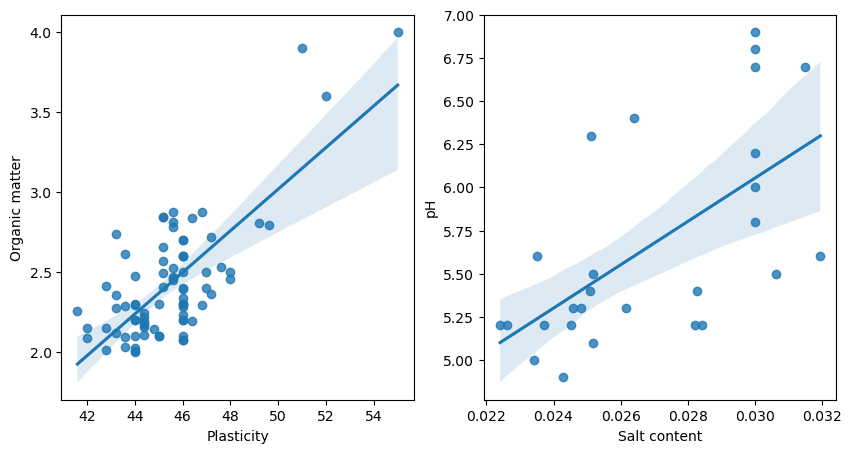

In [59]:
# Pairewise assessment of the variables after removing extrem values
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.regplot(data=df_sub[df_sub["Humus"]>2.0], x="KA", y="Humus")
plt.ylabel("Organic matter")
plt.xlabel("Plasticity")

plt.subplot(1,2,2)
sns.regplot(data=df_sub[df_sub["salt"]>0.0219], x="salt", y="pH_KCl")
plt.ylabel("pH")
plt.xlabel("Salt content");

## Multivariate Exploration


/home/drdc/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


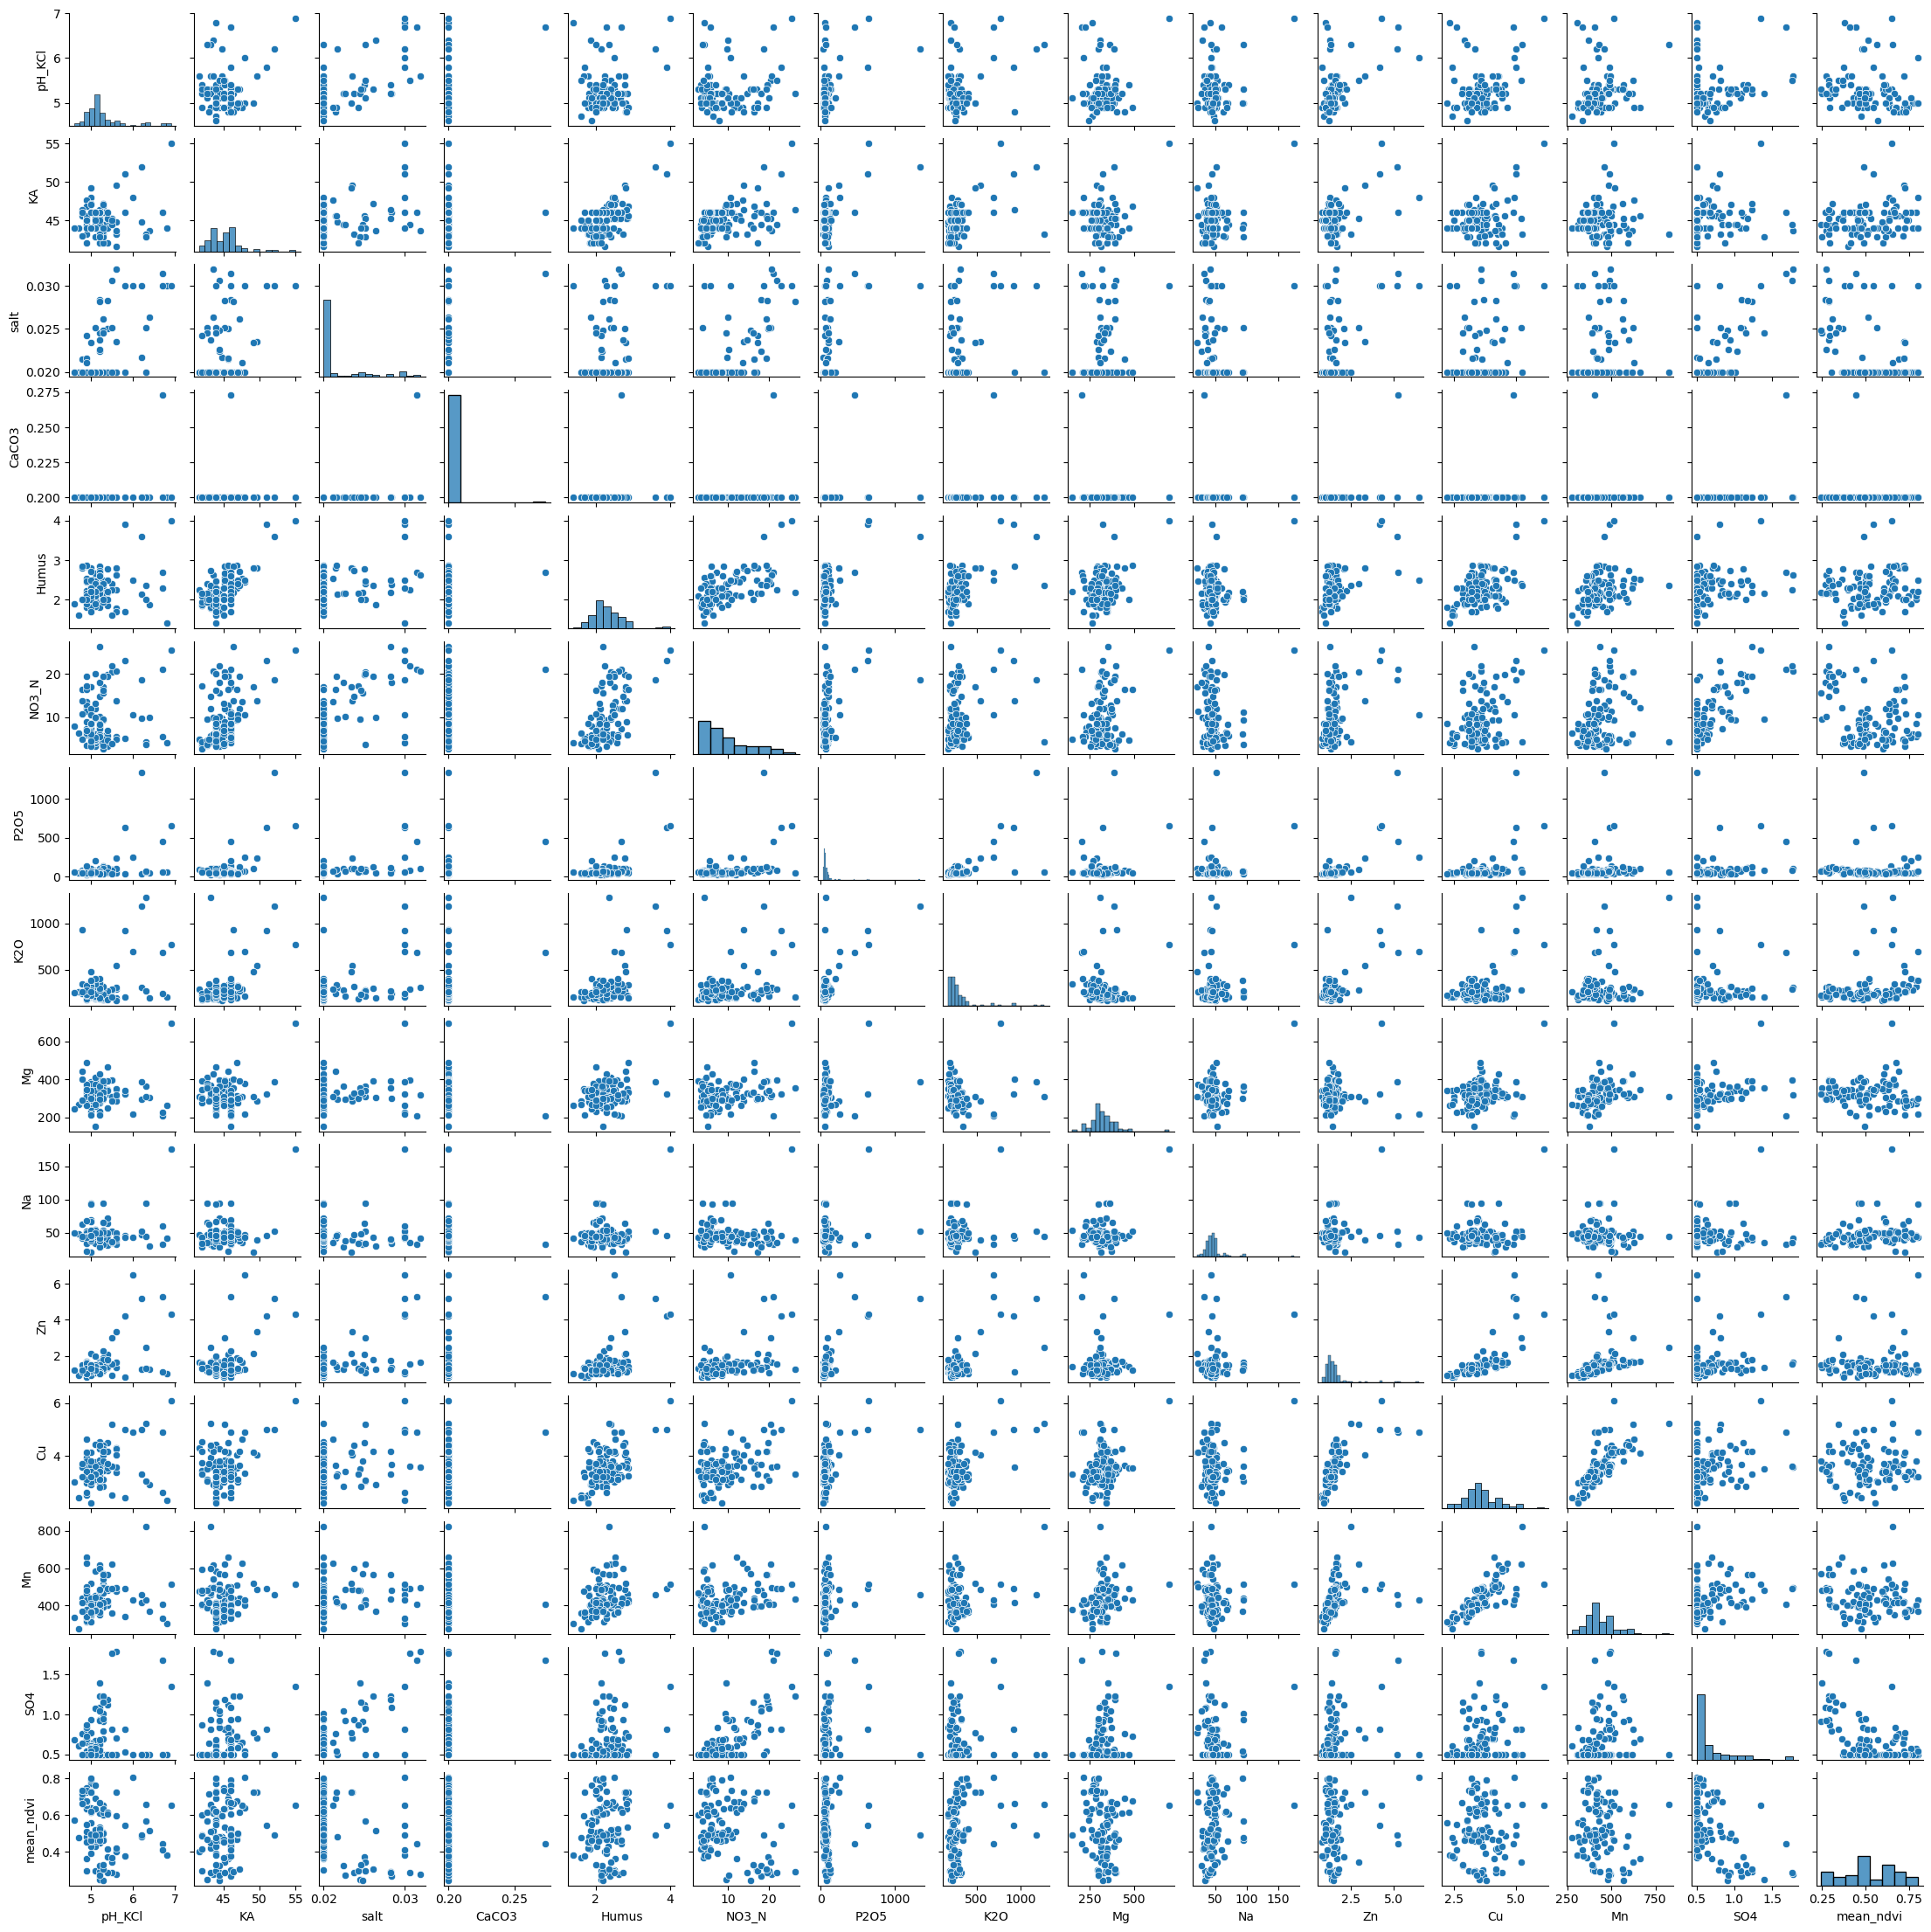

In [60]:
sns.pairplot(df_sub.iloc[:,1:16],size=1.5)
plt.show;

> Based on this figure it can be hard to see the patterns in the data

> The relationship is not clear as we we have more data points



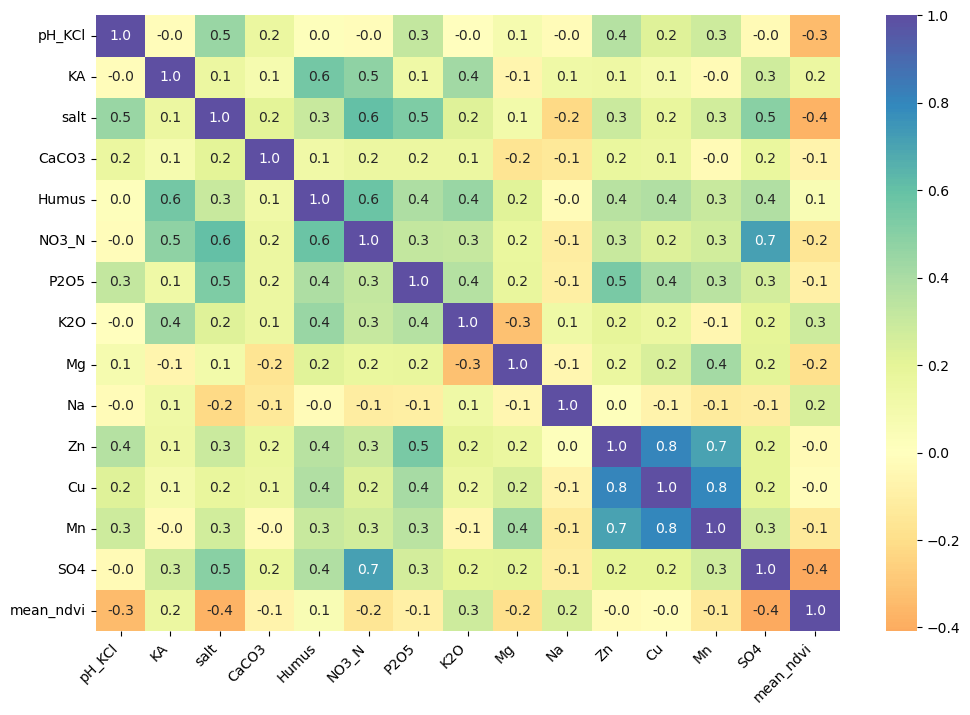

In [61]:
# Here we will present the spearman correlations coefficients between our variables that we calculate earlier

plt.figure(figsize=[12,8])
sns.heatmap(df_sub.iloc[:,1:16].corr(method="spearman"), annot=True,cmap="Spectral",fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right")
plt.show();

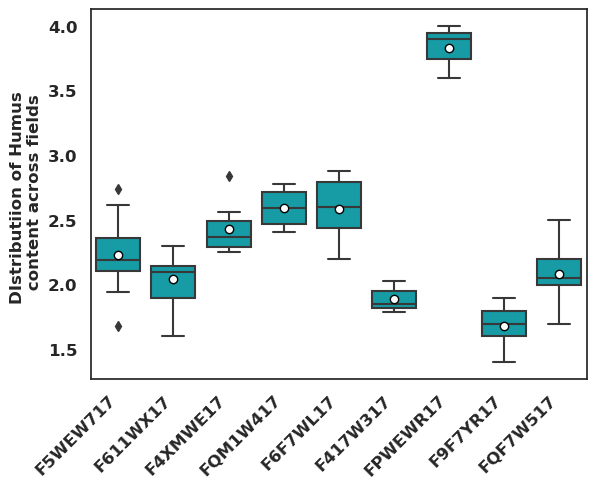

In [78]:
#plot the humus distribution across fields
sns.set_theme(style="white")

sns.boxplot(x='field_id', y='Humus', data=df_sub,showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black"}, color='#00AFBB')
plt.ylabel("DIstributiion of Humus \n content across fields", size=12, weight="bold")
plt.xlabel("")
plt.yticks(size=12,weight="bold")
plt.xticks(size=12,weight="bold")
plt.xticks(rotation=45, ha="right")
plt.show();

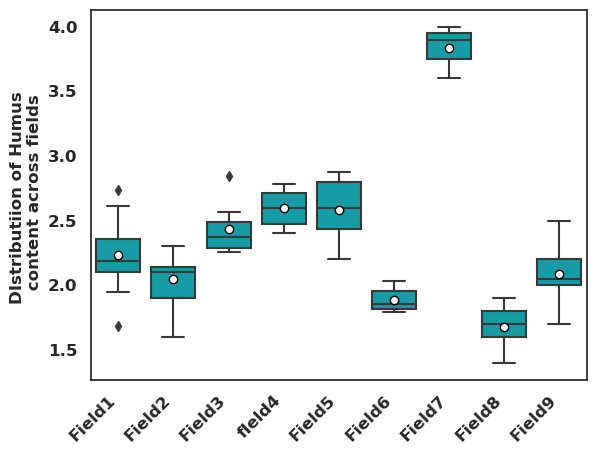

In [85]:
# rename fields  names to have a meaningful information
df_clean=df_sub.replace({"field_id":{'F5WEW717':'Field1', 'F611WX17':'Field2', 'F4XMWE17':'Field3', 'FQM1W417':'fIeld4', 'F6F7WL17':'Field5',
       'F417W317':'Field6', 'FPWEWR17':'Field7', 'F9F7YR17':'Field8', 'FQF7W517':'Field9'}})

df_clean.field_id.unique()


#plot the humus distribution across fields
sns.set_theme(style="white")

sns.boxplot(x='field_id', y='Humus', data=df_clean,showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black"}, color='#00AFBB')
plt.ylabel("DIstributiion of Humus \n content across fields", size=12, weight="bold")
plt.xlabel("")
plt.yticks(size=12,weight="bold")
plt.xticks(size=12,weight="bold")
plt.xticks(rotation=45, ha="right")
plt.show();

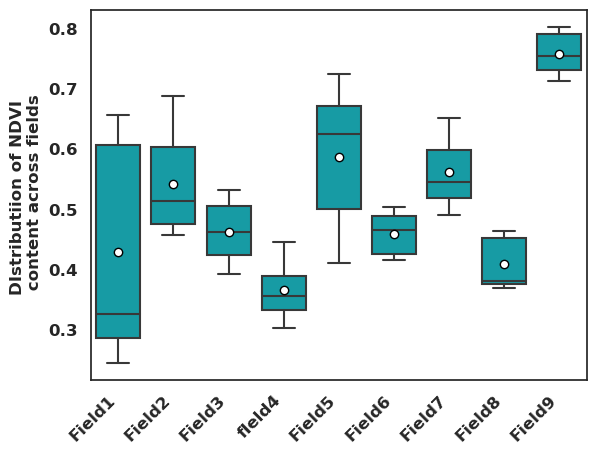

In [86]:
#plot the NDVI distribution across fields
sns.set_theme(style="white")

sns.boxplot(x='field_id', y='mean_ndvi', data=df_clean,showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black"}, color='#00AFBB')
plt.ylabel("DIstributiion of NDVI \n content across fields", size=12, weight="bold")
plt.xlabel("")
plt.yticks(size=12,weight="bold")
plt.xticks(size=12,weight="bold")
plt.xticks(rotation=45, ha="right")
plt.show();

# Explanatory data analysis

In [89]:
df_clean.field_id.value_counts()

Field1    26
Field5    24
Field2    17
Field9    12
Field3     8
Field6     8
Field8     5
fIeld4     4
Field7     3
Name: field_id, dtype: int64

In [91]:
# # create sampling distribution of difference in average
# with boostrapping
diffs = []
Field1=[]
Field5=[]
Field1_mean=df_clean.query('field_id=="Field1"')['Humus'].mean()
Field5_mean=df_clean.query('field_id=="Field5"')['Humus'].mean()
for _ in range(10000):
    b_samp = df_clean.sample(100, replace=True)
    field1_mean =  b_samp.query('field_id=="Field1"')['Humus'].mean()
    field5_mean =  b_samp.query('field_id=="Field5"')['Humus'].mean()

    #append data
    diffs.append(field5_mean-field1_mean)
    Field1.append(field1_mean)
    Field5.append(field5_mean)

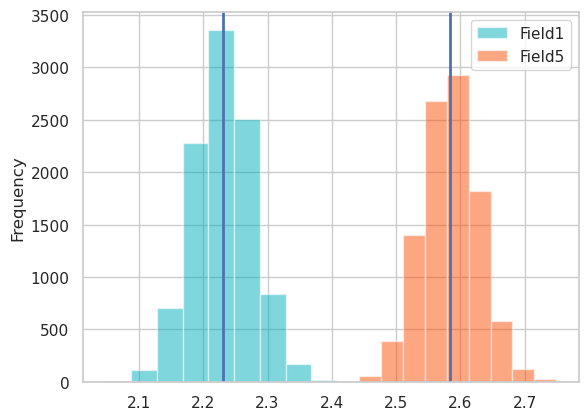

In [94]:
# look at the distributions
sns.set_style("whitegrid")

colors={"Field1":"#E7B800", "Field5":"#FC4E07"}
plt.hist(Field1, alpha = 0.5, color= "#00AFBB")
plt.hist(Field5, alpha = 0.5, color='#FC4E07')
plt.legend(colors)

plt.axvline(Field1_mean, linewidth=2, color='b')
plt.axvline(Field5_mean, linewidth=2,color='b')

plt.ylabel("Frequency")
plt.show();

In [99]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval_field1 = pd.Series(Field1).quantile([0.025,0.975])
print('The 95 perc confidence interval for field1')
print(confidence_interval_field1)

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval_field5 = pd.Series(Field5).quantile([0.025,0.975])
print('The 95 perc confidence interval for field5')
print(confidence_interval_field5)

The 95 perc confidence interval for field1
0.025    2.140983
0.975    2.321301
dtype: float64
The 95 perc confidence interval for field5
0.025    2.499760
0.975    2.670249
dtype: float64


0.025    0.226295
0.975    0.479677
dtype: float64
0.35346937497550046


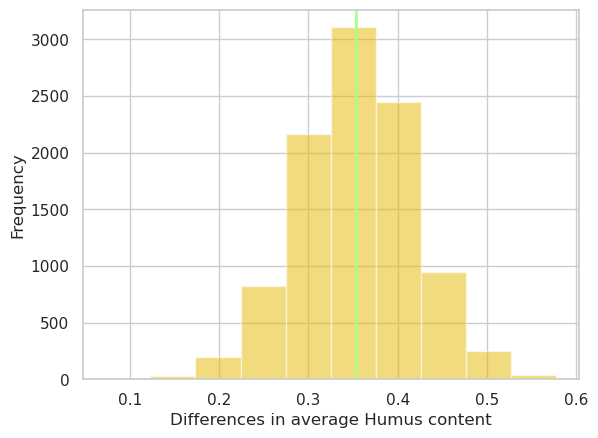

In [105]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval_diff = pd.Series(diffs).quantile([0.025,0.975])
print(confidence_interval_diff)


sns.set_style("whitegrid")
#  convert to numpy array
diff_mean=np.mean(diffs)
print(diff_mean)
# plot sampling distribution
plt.hist(diffs,alpha = 0.5, color="#E7B800")
plt.axvline(diff_mean, linewidth=2,color="#a9ff87")
plt.xlabel("Differences in average Humus content")
plt.ylabel("Frequency")
plt.show();

### Linear Regression Model



In [106]:
# verify the data again

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   field_id   107 non-null    object 
 1   pH_KCl     107 non-null    float64
 2   KA         107 non-null    float64
 3   salt       107 non-null    float64
 4   CaCO3      107 non-null    float64
 5   Humus      107 non-null    float64
 6   NO3_N      107 non-null    float64
 7   P2O5       107 non-null    float64
 8   K2O        107 non-null    float64
 9   Mg         107 non-null    float64
 10  Na         107 non-null    float64
 11  Zn         107 non-null    float64
 12  Cu         107 non-null    float64
 13  Mn         107 non-null    float64
 14  SO4        107 non-null    float64
 15  mean_ndvi  107 non-null    float64
dtypes: float64(15), object(1)
memory usage: 18.3+ KB


In [203]:
df_clean.columns

Index(['field_id', 'pH_KCl', 'KA', 'salt', 'CaCO3', 'Humus', 'NO3_N', 'P2O5',
       'K2O', 'Mg', 'Na', 'Zn', 'Cu', 'Mn', 'SO4', 'mean_ndvi', 'Intercept'],
      dtype='object')

In [204]:
## let us fit a regression model
import statsmodels.api as sm

df_clean["Intercept"]=1 # for now we will set intercept to constant 1
model= sm.OLS(df_clean['Humus'], df_clean[['pH_KCl', 'KA', 'salt', 'CaCO3','NO3_N', 'P2O5',
       'K2O', 'Mg', 'Na', 'Zn', 'Cu', 'Mn', 'SO4', 'mean_ndvi', 'Intercept']])
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Humus   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     16.45
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.57e-19
Time:                        17:18:53   Log-Likelihood:                 9.3145
No. Observations:                 107   AIC:                             11.37
Df Residuals:                      92   BIC:                             51.46
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pH_KCl        -0.1202      0.102     -1.175      0.2

- Due to multicolinearity raised by the model,
- This is because there are lots of correlated variables and this  a big issue for regression models
- We may run into issues of missinterpreting our results
- One way of addressing this multicolinearity issues is to reduce the dimension of th dataset by creating a new dataset of uncorrelated variables
- One option for dimension  reduction is principal component analysis(PCA)

In [132]:
# new data without Humus beacause it is our response data
df_new=df_clean[['field_id', "Humus",'pH_KCl', 'KA', 'salt', 'CaCO3', 'NO3_N', 'P2O5',
       'K2O', 'Mg', 'Na', 'Zn', 'Cu', 'Mn', 'SO4', 'mean_ndvi']]

df_new.head()

,field_id,Humus,pH_KCl,KA,salt,CaCO3,NO3_N,P2O5,K2O,Mg,Na,Zn,Cu,Mn,SO4,mean_ndvi
0,Field1,2.524025,4.9,45.6,0.020000,0.2,12.1,104.4,250.237016,344.15000,44.253303,1.6892,4.0896,660.740,0.70,0.362426
1,Field2,2.144423,6.2,44.8,0.021645,0.2,9.8,35.0,307.592680,295.75000,47.696766,1.2434,3.3180,413.830,0.50,0.480932
2,Field3,2.253877,5.6,41.6,0.020000,0.2,5.0,97.2,290.016495,310.53125,47.363402,1.6608,4.2918,475.405,0.50,0.400637
3,fIeld4,2.497108,5.3,46.0,0.020000,0.2,16.9,69.6,250.147170,293.68750,45.405705,1.6386,3.6522,396.240,0.79,0.302898
4,Field5,2.811486,4.8,45.6,0.021452,0.2,16.4,82.7,244.710592,441.90000,42.171972,1.4844,3.6260,438.275,0.76,0.692812


In [118]:
# Due to issues of multicolinearity

#create a pca obeject
pca=prince.PCA(n_components=4,  n_iter=3,

rescale_with_mean=True,
rescale_with_std=True,
 copy=True,
 check_input=True,
engine='sklearn',
 random_state=42)

In [198]:
# subset the original data and fit a PCA
x=df_new.iloc[:,2:16]
PCA=pca.fit(x)
PCA

PCA(n_components=4, random_state=42)

In [195]:
dir(PCA)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_input',
 '_check_n_features',
 '_column_dist',
 '_eigenvalues_summary',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_scale',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'check_input',
 'column_contributions_',
 'column_coordinates_',
 'column_correlations',
 'column_cosine_similarities_',
 'copy',
 'cumulative_percentage_of_variance_',
 'eigenvalues_',
 

In [200]:
PCA.column_correlations

component,0,1,2,3
variable,,,,
pH_KCl,0.602911,0.000974,0.286057,0.034640
KA,0.632761,-0.343728,-0.019677,0.399325
salt,0.758216,0.405885,0.239139,0.157213
CaCO3,0.369684,0.164166,0.565554,-0.221872
NO3_N,0.692501,0.421646,-0.127645,0.206763
P2O5,0.787877,-0.293059,0.148493,0.122595
K2O,0.688991,-0.441667,0.161713,-0.128132
Mg,0.326709,0.029168,-0.711067,0.292636
Na,0.280414,-0.339908,-0.312152,0.522020


In [213]:
PCA.plot(x)


alt.LayerChart(...)

In [229]:
var=list(PCA.percentage_of_variance_)
var_cum=list(PCA.cumulative_percentage_of_variance_)

print(var)
print(var_cum)

[35.42014376806877, 15.319251566815296, 11.55662496634481, 9.749764715703678]
[35.42014376806877, 50.739395334884065, 62.29602030122888, 72.04578501693256]


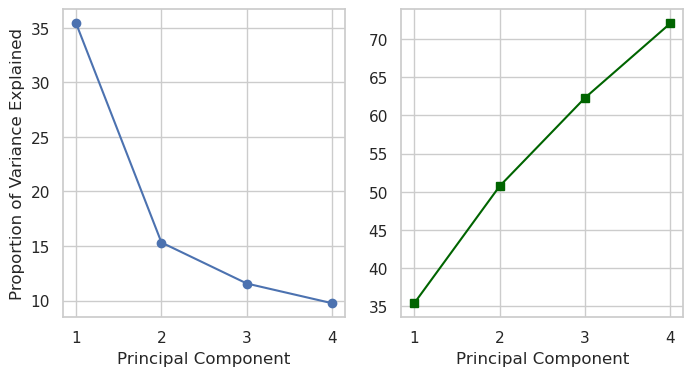

In [258]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot([1,2,3,4], var, '-o', label='Individual component')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')


plt.subplot(1,2,2)
plt.plot([1,2,3,4], var_cum, '-s', label='Cumulative', color="darkgreen")
plt.xlabel('Principal Component')
plt.show();

In [201]:
# Now let's tranform the data
# Fit the PCA model and transform X to get the principal components

df_trans=PCA.transform(x)
df_trans.rename(columns={0:"PC1",1:"PC2", 2:"PC3", 3:"PC4",4:"PC5"}, inplace=True)
df_trans["Humus"]=df_clean["Humus"]
df_trans.head()

component,PC1,PC2,PC3,PC4,Humus
0,0.584302,0.704630,-1.948699,-1.663575,2.524025
1,-0.173169,0.047500,0.803254,0.189625,2.144423
2,-0.456947,0.080782,-0.242857,-1.587615,2.253877
3,0.249911,1.215993,0.085795,0.420805,2.497108
4,0.168150,-0.028243,-1.428863,0.642221,2.811486


In [202]:
# Now let's fit a regression model again and see how it affect the results

## let us fit a regression model
import statsmodels.api as sm

df_trans["Intercept"]=1 # Now we will set intercept to constant 0
model= sm.OLS(df_trans['Humus'], df_trans[['Intercept','PC1','PC2','PC3', 'PC4']])
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Humus   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     33.54
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           7.61e-18
Time:                        17:14:20   Log-Likelihood:                -12.844
No. Observations:                 107   AIC:                             35.69
Df Residuals:                     102   BIC:                             49.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2863      0.027     84.634      0.0